# A.

In [1]:
import pandas as pd
import numpy as np
from skimage import io
import os
# import scipy
import matplotlib.pyplot as plt
import re


In [2]:
dir = "/content/BBBP.csv"
BBBP_df = pd.read_csv(dir )


In [3]:
BBBP_df.head()

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


In [4]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 8.3 MB/s eta 0:00:00


توکنایزر با استفاده از regular expressions

In [7]:
import re

class SmilesTokenizer:
    def __init__(self):
        SMI_REGEX_PATTERN = r"""(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\|\/|:|~|@|\?|>>?|\*|\$|\%[0-9]{2}|[0-9])"""
        self.pattern = re.compile(SMI_REGEX_PATTERN)

    def tokenize(self, smiles):
        tokens = []
        matches = self.pattern.finditer(smiles)
        for match in matches:
            token = match.group(0)
            tokens.append(token)
        return tokens

# Example usage
tokenizer = SmilesTokenizer()
smiles_string = "CC[C@]1(O)C[C@H]2CN(CCc3c([nH]c4ccccc34)"
tokens = tokenizer.tokenize(smiles_string)
print(tokens)

['C', 'C', '[C@]', '1', '(', 'O', ')', 'C', '[C@H]', '2', 'C', 'N', '(', 'C', 'C', 'c', '3', 'c', '(', '[nH]', 'c', '4', 'c', 'c', 'c', 'c', 'c', '3', '4', ')']


loading th dataframe

In [8]:

csv_file_dir = "/content/BBBP.csv"
bbbp_df = pd.read_csv(csv_file_dir)
bbbp_df.head()

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


# plotting the histogram of molecule lengths and the frequency of each happening tokens

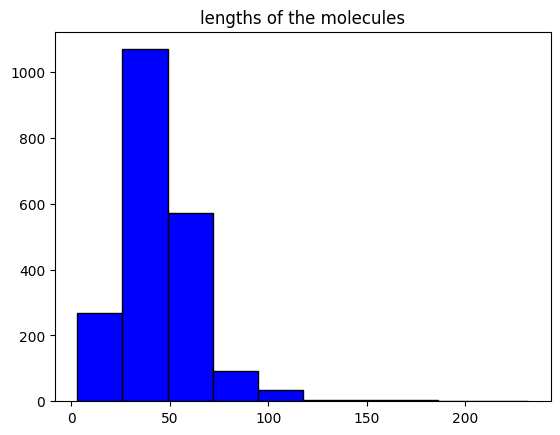

minimum length = 3 and maximum length = 232
frequency of existing of atom/bonds:


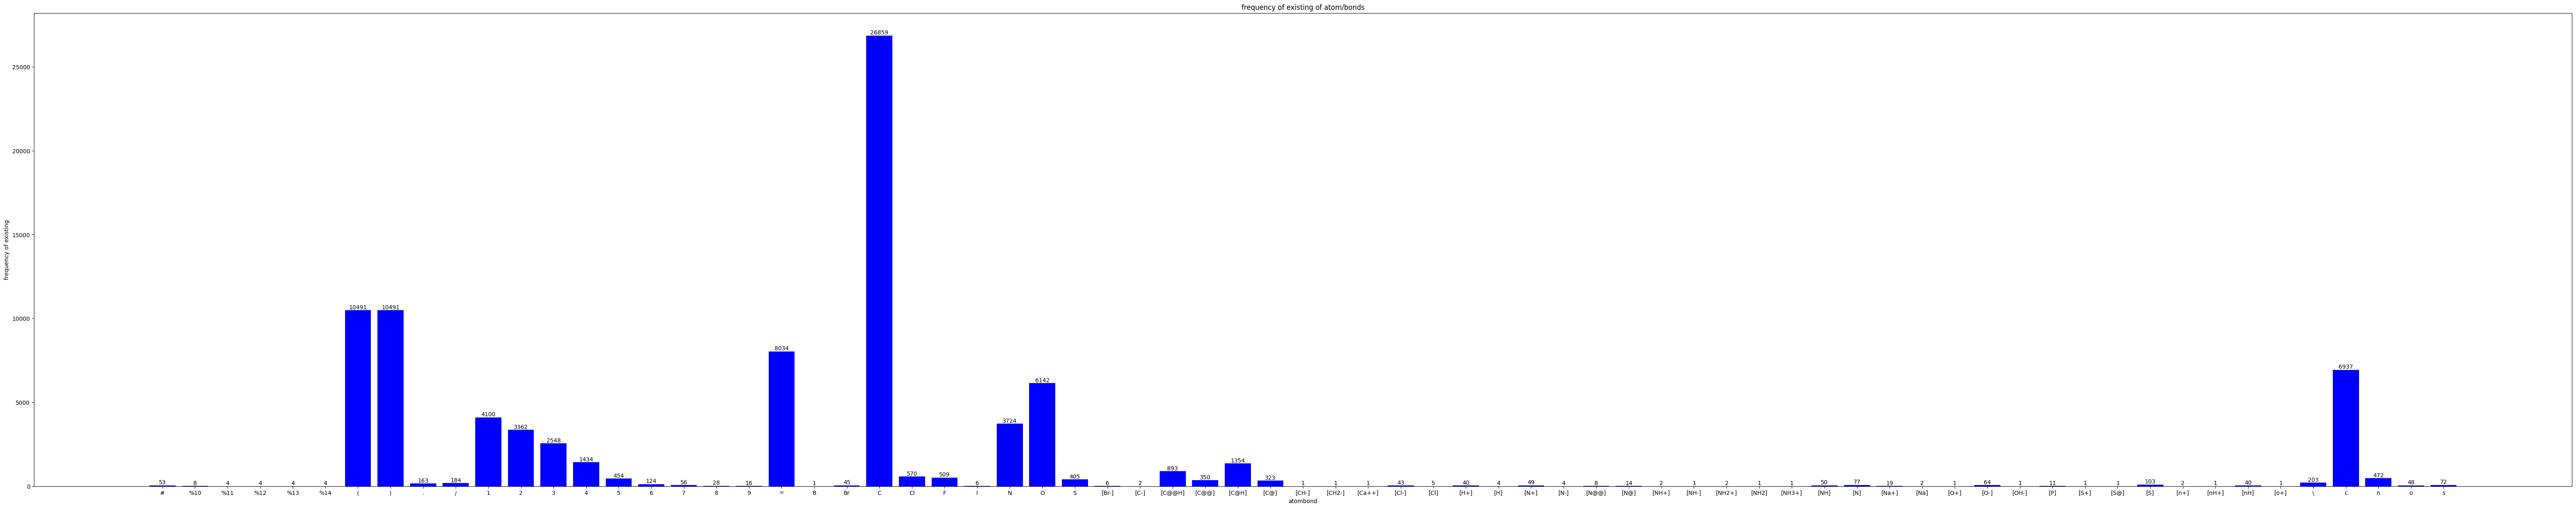

In [9]:
def plot_dictionary(data):
    categories = list(data.keys())
    values = list(data.values())
    fig, ax = plt.subplots(figsize=(80, 15))
    ax.bar(categories, values, color='blue')
    ax.set_xlabel('atombond')
    ax.set_ylabel('frequency of existing')
    ax.set_title('frequency of existing of atom/bonds')

    bars = ax.bar(categories, values, color='blue')

    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                f'{value}', ha='center', va='bottom')

    plt.show()


#finding all the possible atom/bonds
chars = []
bbbp_df.iloc[:, 3].apply(lambda x: chars.extend(list(tokenizer.tokenize(x))))
chars = sorted(list(set(chars)))
lengths = []

frequency_dict = {c:0 for i, c in enumerate(chars, 1)}
for molcule in bbbp_df.iloc[:, 3]:
  tokenized_mol = tokenizer.tokenize(molcule)
  lengths.append(len(tokenized_mol))

  for atombond in tokenized_mol:
    frequency_dict[atombond] += 1


bins=10
plt.hist(lengths, bins=bins, color='blue', edgecolor='black')
plt.title('lengths of the molecules')
plt.show()
print(f"minimum length = {min(lengths)} and maximum length = {max(lengths)}")
print('frequency of existing of atom/bonds:')
plot_dictionary(frequency_dict)
max_pad = max(lengths)




In [10]:
import torch
import torch.nn.functional as F


tokenization_dict = {c:i for i, c in enumerate(chars,1)}
mol = bbbp_df.iloc[0, 3]
tokenized_sequence = torch.tensor([tokenization_dict[x] for x in tokenizer.tokenize(mol)])
num_classes = len(chars)
# Use F.one_hot to perform one-hot encoding
one_hot = F.one_hot(tokenized_sequence, num_classes)
print(tokenization_dict)
print(tokenizer.tokenize(mol))
print(tokenized_sequence)

{'#': 1, '%10': 2, '%11': 3, '%12': 4, '%13': 5, '%14': 6, '(': 7, ')': 8, '.': 9, '/': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, '=': 20, 'B': 21, 'Br': 22, 'C': 23, 'Cl': 24, 'F': 25, 'I': 26, 'N': 27, 'O': 28, 'S': 29, '[Br-]': 30, '[C-]': 31, '[C@@H]': 32, '[C@@]': 33, '[C@H]': 34, '[C@]': 35, '[CH-]': 36, '[CH2-]': 37, '[Ca++]': 38, '[Cl-]': 39, '[Cl]': 40, '[H+]': 41, '[H]': 42, '[N+]': 43, '[N-]': 44, '[N@@]': 45, '[N@]': 46, '[NH+]': 47, '[NH-]': 48, '[NH2+]': 49, '[NH2]': 50, '[NH3+]': 51, '[NH]': 52, '[N]': 53, '[Na+]': 54, '[Na]': 55, '[O+]': 56, '[O-]': 57, '[OH-]': 58, '[P]': 59, '[S+]': 60, '[S@]': 61, '[S]': 62, '[n+]': 63, '[nH+]': 64, '[nH]': 65, '[o+]': 66, '\\': 67, 'c': 68, 'n': 69, 'o': 70, 's': 71}
['[Cl]', '.', 'C', 'C', '(', 'C', ')', 'N', 'C', 'C', '(', 'O', ')', 'C', 'O', 'c', '1', 'c', 'c', 'c', 'c', '2', 'c', 'c', 'c', 'c', 'c', '1', '2']
tensor([40,  9, 23, 23,  7, 23,  8, 27, 23, 23,  7, 28,  8, 23, 28, 68, 11, 68

In [11]:
def padding_tensor(sequences,max_len=max_pad):
    """
    :param sequences: list of tensors
    :return:
    """
    # max_len = max([s.size(0) for s in sequences])
    out_tensor = sequences[0].data.new(max_len).fill_(0)
    mask = sequences[0].data.new(max_len).fill_(0)
    tensor =sequences
    length = tensor.size(0)
    out_tensor[:length] = tensor
    mask[:length] = 1
    return out_tensor, mask

In [12]:
l = [torch.tensor([1,2,3]), torch.tensor([4,5]),torch.tensor([6,7,8,9])]
print(padding_tensor(tokenized_sequence))

(tensor([40,  9, 23, 23,  7, 23,  8, 27, 23, 23,  7, 28,  8, 23, 28, 68, 11, 68,
        68, 68, 68, 12, 68, 68, 68, 68, 68, 11, 12,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,

In [13]:
tensor_sequence,_ = padding_tensor(tokenized_sequence)
one_hot_sequence = F.one_hot(tensor_sequence, num_classes=num_classes+1)
# for m in one_hot_sequence:
#   print(m)

dataset for FC network

In [14]:
from tqdm import tqdm
# Datset class
import pandas as pd
import numpy as np
from skimage import io
import os
from torch.utils.data import Dataset
import torch

class BBBPDataset_FC(Dataset):
    def __init__(self, bbbp_df, tokenizer=tokenizer, transform=None):
        self.transform = transform
        # Traverse through the directory and its subdirectories
        self.df = bbbp_df
        self.molecule_seq = []
        self.labels = []
        self.lengths = []
        self.chars = []


        #finding all the possible atom/bonds

        self.df.iloc[:, 3].apply(lambda x: self.chars.extend(list(tokenizer.tokenize(x))))
        self.chars = sorted(list(set(self.chars)))


        frequency_dict = {c:0 for i, c in enumerate(self.chars, 1)}
        for molcule in self.df.iloc[:, 3]:
          tokenized_mol = tokenizer.tokenize(molcule)
          self.lengths.append(len(tokenized_mol))

        self.max_pad = max(self.lengths)
        self.num_classes = len(self.chars)

        tokenization_dict = {c:i for i, c in enumerate(chars,1)}
        for i, mol in enumerate(self.df.iloc[:, 3]):
          tokenized_sequence = torch.tensor([tokenization_dict[x] for x in tokenizer.tokenize(mol)])
          tensor_sequence,_ = padding_tensor(tokenized_sequence)
          one_hot_sequence = F.one_hot(tensor_sequence, num_classes=self.num_classes+1)
          self.molecule_seq.append(torch.tensor(one_hot_sequence.flatten(),
                                                dtype=torch.float32))
          self.labels.append(self.df.iloc[i, 2])



    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        flattened_seq = self.molecule_seq[idx]
        label = self.labels[idx]
        sample = (flattened_seq,label)
        return sample
    def padding_tensor(self,sequences,max_len=max_pad):
      """
      :param sequences: list of tensors
      :return:
      """
      # max_len = max([s.size(0) for s in sequences])
      out_tensor = sequences[0].data.new(max_len).fill_(0)
      mask = sequences[0].data.new(max_len).fill_(0)
      tensor =sequences
      length = tensor.size(0)
      out_tensor[:length] = tensor
      mask[:length] = 1
      return out_tensor, mask


In [15]:
ds = BBBPDataset_FC(bbbp_df, tokenizer=tokenizer, transform=None)
print(len(ds[1][0]))
for z in ds[1][0]:
  print(z.item(), end=" ")

<ipython-input-14-0c935b2ab276>:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.molecule_seq.append(torch.tensor(one_hot_sequence.flatten(),


16704
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.

In [16]:

dataset = BBBPDataset_FC(bbbp_df, tokenizer=tokenizer, transform=None)

<ipython-input-14-0c935b2ab276>:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.molecule_seq.append(torch.tensor(one_hot_sequence.flatten(),


In [17]:

from torch.utils.data import DataLoader, random_split
import torch
# defining the sizes for the train and test datasets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
batch_size = 8
# using random_split to create train and test datasets
FC_train_set, FC_test_set = random_split(dataset, [train_size, test_size])

# creating DataLoader
FC_train_loader = DataLoader(FC_train_set, batch_size=batch_size, shuffle=True)
FC_test_loader = DataLoader(FC_test_set, batch_size=batch_size, shuffle=False)

# B.

In [18]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset

# Recurrent neural network (many-to-one)
class FC_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FC_net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



In [55]:
num_epochs = 8
learning_rate = 0.001
class FC_Learner(object):
    def __init__(self, model, trainloader, testloader,num_epochs=num_epochs, learning_rate = 0.001):
      self.model = model
      self.trainloader = trainloader
      self.testloader = testloader
      self.num_epochs = num_epochs
      self.learning_rate = learning_rate
    def train_model(self):

        device = "cuda" if torch.cuda.is_available() else "cpu"


        #Loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        optimizer.zero_grad()
        total_loss = []
        #Train the model
        total_step = len(self.trainloader)
        cnt_batches = 0
        tr_accs = []
        test_accs = []
        for epoch in range(1, 1+num_epochs):
            cnt_correct, cnt_total = 0, 0
            epoch_loss = 0
            epoch_samp = 0
            self.model.to(device)
            self.model.train()
            for i, (seq, labels) in enumerate(self.trainloader):
                cnt_batches += len(labels)

                seq = seq.to(device).float()
                labels = labels.to(device)

                # Forward pass
                # print(seq.shape)
                outputs = model(seq)
                loss = criterion(outputs, labels)
                epoch_loss += loss.item()
                epoch_samp += 1
                # Backward and optimize
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                # Record result
                _, argmax = torch.max(outputs, 1)
                cnt_correct += (labels == argmax.squeeze()).sum().item()
                cnt_total += labels.size(0)

                # Print accuracy
                train_accu = cnt_correct/cnt_total
                if (i+1) % 50 == 0 or (i+1) == len(self.trainloader):
                    print ('Epoch [{}/{}], Step [{}/{}], Loss = {:.4f}, Train accuracy = {:.2f}'
                        .format(epoch, self.num_epochs, i+1, total_step, loss.item(), 100*train_accu))
                continue

            print(f"Epoch {epoch} completes")
            total_loss.append(epoch_loss/epoch_samp)
            self.model.eval()
            # -- Evaluate and save model
            if (epoch) % 1 == 0 or (epoch) == num_epochs:
                eval_accu = self.evaluate_model(self.model, self.testloader, num_to_eval=-1)

                #record the accuracies
                tr_accs.append(train_accu)
                test_accs.append(eval_accu)

            # An epoch end
            print("-"*80 + "\n")

        # Training end
        return self.model, total_loss, tr_accs, test_accs


    def evaluate_model(self,model, eval_loader, num_to_eval=-1):
        ''' Eval model on a dataset '''
        device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model.eval()
        correct = 0
        total = 0
        for i, (seq, labels) in enumerate(self.testloader):

            seq = seq.to(device).float() # (batch, seq_len, input_size)
            labels = labels.to(device)

            # Predict
            outputs = self.model(seq)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            _, argmax = torch.max(outputs, 1)
            correct += (labels == argmax.squeeze()).sum().item()

            # stop
            if i+1 == num_to_eval:
                break
        eval_accu = correct / total
        print('  Evaluate on eval or test dataset with {} samples: Accuracy = {}%'.format(
            i+1, 100 * eval_accu))
        return eval_accu



In [56]:
# model params
batch_size = 8


# Create model
device = "cuda" if torch.cuda.is_available() else "cpu"
input_size = 16704
hidden_size = 10
output_size = 2
model = FC_net(input_size, hidden_size, output_size)


#Learner
FC_learner = FC_Learner(model, FC_train_loader, FC_test_loader,num_epochs=num_epochs, learning_rate = 0.001)
FC_model, FC_total_loss, FC_tr_accs, FC_test_accs =FC_learner.train_model()



Epoch [1/8], Step [50/205], Loss = 0.7652, Train accuracy = 76.00
Epoch [1/8], Step [100/205], Loss = 0.3138, Train accuracy = 78.00
Epoch [1/8], Step [150/205], Loss = 0.3507, Train accuracy = 78.58
Epoch [1/8], Step [200/205], Loss = 0.3757, Train accuracy = 78.69
Epoch [1/8], Step [205/205], Loss = 0.4789, Train accuracy = 78.78
Epoch 1 completes
  Evaluate on eval or test dataset with 52 samples: Accuracy = 78.04878048780488%
--------------------------------------------------------------------------------

Epoch [2/8], Step [50/205], Loss = 0.4243, Train accuracy = 85.50
Epoch [2/8], Step [100/205], Loss = 0.3908, Train accuracy = 84.75
Epoch [2/8], Step [150/205], Loss = 0.2610, Train accuracy = 85.92
Epoch [2/8], Step [200/205], Loss = 0.4336, Train accuracy = 86.44
Epoch [2/8], Step [205/205], Loss = 0.1209, Train accuracy = 86.46
Epoch 2 completes
  Evaluate on eval or test dataset with 52 samples: Accuracy = 83.65853658536585%
--------------------------------------------------

#C.
#LSTM

dataset for RNN networks

In [25]:

class BBBPDataset_RNN(Dataset):
    def __init__(self, bbbp_df, tokenizer=tokenizer, transform=None):
        self.transform = transform
        # Traverse through the directory and its subdirectories
        self.df = bbbp_df
        self.molecule_seq = []
        self.labels = []
        self.lengths = []
        self.chars = []


        #finding all the possible atom/bonds

        self.df.iloc[:, 3].apply(lambda x: self.chars.extend(list(tokenizer.tokenize(x))))
        self.chars = sorted(list(set(self.chars)))


        frequency_dict = {c:0 for i, c in enumerate(self.chars, 1)}
        for molcule in self.df.iloc[:, 3]:
          tokenized_mol = tokenizer.tokenize(molcule)
          self.lengths.append(len(tokenized_mol))

        self.max_pad = max(self.lengths)
        self.num_classes = len(self.chars)

        tokenization_dict = {c:i for i, c in enumerate(chars,1)}
        for i, mol in enumerate(self.df.iloc[:, 3]):
          tokenized_sequence = torch.tensor([tokenization_dict[x] for x in tokenizer.tokenize(mol)])
          tensor_sequence,_ = self.padding_tensor(tokenized_sequence)
          one_hot_sequence = F.one_hot(tensor_sequence, num_classes=self.num_classes+1)
          self.molecule_seq.append(torch.tensor(one_hot_sequence, dtype=torch.float32))
          self.labels.append(self.df.iloc[i, 2])



    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        flattened_seq = self.molecule_seq[idx]
        label = self.labels[idx]
        length = self.lengths[idx]
        sample = (flattened_seq,label,length)
        return sample
    def padding_tensor(self,sequences,max_len=max_pad):
      """
      :param sequences: list of tensors
      :return:
      """
      # max_len = max([s.size(0) for s in sequences])
      out_tensor = sequences[0].data.new(max_len).fill_(0)
      mask = sequences[0].data.new(max_len).fill_(0)
      tensor =sequences
      length = tensor.size(0)
      out_tensor[:length] = tensor
      mask[:length] = 1
      return out_tensor, mask


train test split

In [26]:
dataset = BBBPDataset_RNN(bbbp_df, tokenizer=tokenizer, transform=None)
from torch.utils.data import DataLoader, random_split
import torch
# defining the sizes for the train and test datasets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
batch_size = 8
# using random_split to create train and test datasets
RNN_train_set, RNN_test_set = random_split(dataset, [train_size, test_size])

# creating DataLoader
RNN_train_loader = DataLoader(RNN_train_set, batch_size=batch_size, shuffle=True)
RNN_test_loader = DataLoader(RNN_test_set, batch_size=batch_size, shuffle=False)

<ipython-input-25-d8e19a8a2c8c>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.molecule_seq.append(torch.tensor(one_hot_sequence, dtype=torch.float32))


model

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset

# Recurrent neural network (many-to-one)
class LSTM_net(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, device, classes=None):
        super(LSTM_net, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.device = device
        self.classes = classes

    def forward(self, x, length):
        # Set initial hidden and cell states
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(self.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(self.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # shape = (batch_size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # print(out.shape)
        # print(length-1)
        clone_out= out.clone()
        t_out = clone_out[:,0,:]*0
        # print("tt", t_out.shape)
        for i, o in enumerate(out):
          t_out[i,:] = o[length[i]-1, :]
        out = t_out
        # print("op", out.shape)
        out = self.fc(out)
        # print(out.shape)
        return out




RNN learner

In [53]:
num_epochs = 100
learning_rate = 0.001
class RNN_Learner(object):
    def __init__(self, model, trainloader, testloader,num_epochs=num_epochs, learning_rate = 0.001):
      self.model = model
      self.trainloader = trainloader
      self.testloader = testloader
      self.num_epochs = num_epochs
      self.learning_rate = learning_rate
    def train_model(self):

        device = "cuda" if torch.cuda.is_available() else "cpu"


        #Loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        optimizer.zero_grad()
        total_loss = []
        #Train the model
        total_step = len(self.trainloader)
        cnt_batches = 0
        tr_accs = []
        test_accs = []
        for epoch in range(1, 1+num_epochs):
            cnt_correct, cnt_total = 0, 0
            epoch_loss = 0
            epoch_samp = 0
            self.model.to(device)
            self.model.train()
            for i, (seq, labels,length) in enumerate(self.trainloader):
                cnt_batches += len(labels)

                seq = seq.to(device).float()
                labels = labels.to(device)

                # Forward pass
                # print(seq.shape)
                outputs = self.model(seq,length)
                loss = criterion(outputs, labels)
                epoch_loss += loss.item()
                epoch_samp += 1
                # Backward and optimize
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                # Record result
                _, argmax = torch.max(outputs, 1)
                cnt_correct += (labels == argmax.squeeze()).sum().item()
                cnt_total += labels.size(0)

                # Print accuracy
                train_accu = cnt_correct/cnt_total
                if (i+1) % 50 == 0 or (i+1) == len(self.trainloader):
                    print ('Epoch [{}/{}], Step [{}/{}], Loss = {:.4f}, Train accuracy = {:.2f}'
                        .format(epoch, self.num_epochs, i+1, total_step, loss.item(), 100*train_accu))
                continue

            print(f"Epoch {epoch} completes")
            total_loss.append(epoch_loss/epoch_samp)
            self.model.eval()
            # -- Evaluate and save model
            if (epoch) % 1 == 0 or (epoch) == num_epochs:
                eval_accu = self.evaluate_model(self.model, self.testloader, num_to_eval=-1)

                #record the accuracies
                tr_accs.append(train_accu)
                test_accs.append(eval_accu)

            # An epoch end
            print("-"*80 + "\n")

        # Training end
        return self.model, total_loss, tr_accs, test_accs


    def evaluate_model(self,model, eval_loader, num_to_eval=-1):
        ''' Eval model on a dataset '''
        device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model.eval()
        correct = 0
        total = 0
        for i, (seq, labels,length) in enumerate(self.testloader):

            seq = seq.to(device).float() # (batch, seq_len, input_size)
            labels = labels.to(device)

            # Predict
            outputs = self.model(seq,length)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            _, argmax = torch.max(outputs, 1)
            correct += (labels == argmax.squeeze()).sum().item()

            # stop
            if i+1 == num_to_eval:
                break
        eval_accu = correct / total
        print('  Evaluate on eval or test dataset with {} samples: Accuracy = {}%'.format(
            i+1, 100 * eval_accu))
        return eval_accu



In [54]:
# model params
input_size = 72  #feature vectors
batch_size = 8
hidden_size = 64
num_layers = 4
num_classes = 2
num_epochs = 50

# Create model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = LSTM_net(input_size, hidden_size, num_layers, num_classes, device).to(device)

#Learner
LSTM_learner = RNN_Learner(model, RNN_train_loader, RNN_test_loader,num_epochs=num_epochs, learning_rate = 0.001)
LSTM_model, LSTM_total_loss, LSTM_tr_accs, LSTM_test_accs =LSTM_learner.train_model()


Epoch [1/50], Step [50/205], Loss = 0.5765, Train accuracy = 81.50
Epoch [1/50], Step [100/205], Loss = 0.6129, Train accuracy = 79.38
Epoch [1/50], Step [150/205], Loss = 0.3308, Train accuracy = 78.92
Epoch [1/50], Step [200/205], Loss = 0.8904, Train accuracy = 78.12
Epoch [1/50], Step [205/205], Loss = 0.1397, Train accuracy = 78.17
Epoch 1 completes
  Evaluate on eval or test dataset with 52 samples: Accuracy = 74.63414634146342%
--------------------------------------------------------------------------------

Epoch [2/50], Step [50/205], Loss = 0.2674, Train accuracy = 76.50
Epoch [2/50], Step [100/205], Loss = 0.4346, Train accuracy = 77.25
Epoch [2/50], Step [150/205], Loss = 0.4691, Train accuracy = 78.50
Epoch [2/50], Step [200/205], Loss = 0.1067, Train accuracy = 77.62
Epoch [2/50], Step [205/205], Loss = 0.5723, Train accuracy = 77.80
Epoch 2 completes
  Evaluate on eval or test dataset with 52 samples: Accuracy = 80.73170731707317%
----------------------------------------

## D. BiLSTM

In [46]:
import torch.nn.functional as F

class BiLSTM_net(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, device, classes=None):
        super(BiLSTM_net, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # bidirectional LSTM
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)

        # linear layer for classification
        self.fc = nn.Linear(2 * hidden_size, num_classes)  # Multiply hidden_size by 2 for bidirectional

        self.device = device
        self.classes = classes

    def forward(self, x,lenght):
        # set initial hidden and cell states
        batch_size = x.size(0)
        h0 = torch.zeros(2 * self.num_layers, batch_size, self.hidden_size).to(self.device)  # Multiply num_layers by 2 for bidirectional
        c0 = torch.zeros(2 * self.num_layers, batch_size, self.hidden_size).to(self.device)

        # Forward propagate Bidirectional LSTM
        out, _ = self.lstm(x, (h0, c0))  # shape = (batch_size, seq_length, 2 * hidden_size)

        # concatenate the hidden states from both directions
        out = torch.cat((out[:, -1, :self.hidden_size], out[:, 0, self.hidden_size:]), dim=1)

        # linear layer for classification
        out = self.fc(out)
        return out



In [45]:
# model params
input_size = 72  #feature vectors
batch_size = 8
hidden_size = 64
num_layers = 4
num_classes = 2
num_epochs = 50

# Create model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = BiLSTM_net(input_size, hidden_size, num_layers, num_classes, device).to(device)

#Learner
BiLSTM_learner = RNN_Learner(model, RNN_train_loader, RNN_test_loader,num_epochs=num_epochs, learning_rate = 0.001)
BiLSTM_model, BiLSTM_total_loss, BiLSTM_tr_accs, BiLSTM_test_accs =BiLSTM_learner.train_model()

Epoch [1/100], Step [50/205], Loss = 0.2202, Train accuracy = 76.50
Epoch [1/100], Step [100/205], Loss = 0.3765, Train accuracy = 78.75
Epoch [1/100], Step [150/205], Loss = 0.5629, Train accuracy = 78.33
Epoch [1/100], Step [200/205], Loss = 0.6956, Train accuracy = 77.12
Epoch [1/100], Step [205/205], Loss = 0.7065, Train accuracy = 77.32
Epoch 1 completes
  Evaluate on eval or test dataset with 52 samples: Accuracy = 72.92682926829268%
--------------------------------------------------------------------------------

Epoch [2/100], Step [50/205], Loss = 0.4414, Train accuracy = 76.75
Epoch [2/100], Step [100/205], Loss = 0.7092, Train accuracy = 77.50
Epoch [2/100], Step [150/205], Loss = 0.5657, Train accuracy = 77.58
Epoch [2/100], Step [200/205], Loss = 0.5653, Train accuracy = 77.50
Epoch [2/100], Step [205/205], Loss = 0.7341, Train accuracy = 77.32
Epoch 2 completes
  Evaluate on eval or test dataset with 52 samples: Accuracy = 72.92682926829268%
------------------------------

# E. cross validation

CV for FC network

In [60]:
from torch.utils.data import  ConcatDataset
from sklearn.model_selection import KFold




# Configuration options
k_folds = 10
num_epochs = 20

# For fold results
results = {}

# Set fixed random number seed
torch.manual_seed(42)

# Prepare dataset by concatenating Train/Test part; we split later.
# model params
batch_size = 8
dataset = BBBPDataset_FC(bbbp_df, tokenizer=tokenizer, transform=None)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
batch_size = 8
# using random_split to create train and test datasets
FC_train_set, FC_test_set = random_split(dataset, [train_size, test_size])

dataset = ConcatDataset([FC_train_set, FC_test_set])

# Define the K-fold Cross Validator
kfold = KFold(n_splits=k_folds, shuffle=True)

# Start print
print('--------------------------------')

# K-fold Cross Validation model evaluation
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):

  # Print
  print(f'FOLD {fold}')
  print('--------------------------------')

  # Sample elements randomly from a given list of ids, no replacement.
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)



  # Define data loaders for training and testing data in this fold
  FC_train_loader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=10, sampler=train_subsampler)
  FC_test_loader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=10, sampler=test_subsampler)

  # Init the neural network
  # Create model
  device = "cuda" if torch.cuda.is_available() else "cpu"
  input_size = 16704
  hidden_size = 10
  output_size = 2
  model = FC_net(input_size, hidden_size, output_size)


  #Learner
  FC_learner = FC_Learner(model, FC_train_loader, FC_test_loader,num_epochs=num_epochs, learning_rate = 0.001)
  FC_model, FC_total_loss, FC_tr_accs, FC_test_accs =FC_learner.train_model()


  # Saving the model
  save_path = f'./FC_model-fold-{fold}.pth'
  torch.save(model.state_dict(), save_path)

  # Evaluationfor this fold
  # print(fold,FC_test_accs)
  print('Accuracy for fold %d: %f %%' % (fold, 100.0 * FC_test_accs[-1]))
  print('--------------------------------')
  results[fold] = 100.0 * (FC_test_accs[-1])

# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

<ipython-input-14-0c935b2ab276>:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.molecule_seq.append(torch.tensor(one_hot_sequence.flatten(),


--------------------------------
FOLD 0
--------------------------------
Epoch [1/20], Step [50/185], Loss = 0.3538, Train accuracy = 75.00
Epoch [1/20], Step [100/185], Loss = 0.2194, Train accuracy = 77.00
Epoch [1/20], Step [150/185], Loss = 0.5017, Train accuracy = 78.33
Epoch [1/20], Step [185/185], Loss = 0.3711, Train accuracy = 78.97
Epoch 1 completes
  Evaluate on eval or test dataset with 21 samples: Accuracy = 83.90243902439025%
--------------------------------------------------------------------------------

Epoch [2/20], Step [50/185], Loss = 0.4479, Train accuracy = 86.20
Epoch [2/20], Step [100/185], Loss = 0.4690, Train accuracy = 86.90
Epoch [2/20], Step [150/185], Loss = 0.1842, Train accuracy = 86.73
Epoch [2/20], Step [185/185], Loss = 0.5055, Train accuracy = 86.99
Epoch 2 completes
  Evaluate on eval or test dataset with 21 samples: Accuracy = 85.36585365853658%
--------------------------------------------------------------------------------

Epoch [3/20], Step [5

CV for LSTM

In [65]:
from torch.utils.data import  ConcatDataset
from sklearn.model_selection import KFold




# Configuration options
k_folds = 10
num_epochs = 20

# For fold results
results = {}

# Set fixed random number seed
torch.manual_seed(42)

# Prepare dataset by concatenating Train/Test part; we split later.
# model params
batch_size = 8
dataset = BBBPDataset_RNN(bbbp_df, tokenizer=tokenizer, transform=None)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
batch_size = 8
# using random_split to create train and test datasets
RNN_train_set, RNN_test_set = random_split(dataset, [train_size, test_size])

dataset = ConcatDataset([RNN_train_set, RNN_test_set])

# Define the K-fold Cross Validator
kfold = KFold(n_splits=k_folds, shuffle=True)

# Start print
print('--------------------------------')

# K-fold Cross Validation model evaluation
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):

  # Print
  print(f'FOLD {fold}')
  print('--------------------------------')

  # Sample elements randomly from a given list of ids, no replacement.
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)



  # Define data loaders for training and testing data in this fold
  RNN_train_loader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=10, sampler=train_subsampler)
  RNN_test_loader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=10, sampler=test_subsampler)

  # Init the neural network
  # Create model
  input_size = 72  #feature vectors
  batch_size = 8
  hidden_size = 64
  num_layers = 4
  num_classes = 2

  # Create model
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model = LSTM_net(input_size, hidden_size, num_layers, num_classes, device).to(device)

  #Learner
  LSTM_learner = RNN_Learner(model, RNN_train_loader, RNN_test_loader,num_epochs=num_epochs, learning_rate = 0.001)
  LSTM_model, LSTM_total_loss, LSTM_tr_accs, LSTM_test_accs =LSTM_learner.train_model()


  #Learner
  RNN_learner = RNN_Learner(model, RNN_train_loader, RNN_test_loader,num_epochs=num_epochs, learning_rate = 0.001)
  RNN_model, RNN_total_loss, RNN_tr_accs, RNN_test_accs =RNN_learner.train_model()


  # Saving the model
  save_path = f'./RNN_model-fold-{fold}.pth'
  torch.save(model.state_dict(), save_path)

  # Evaluationfor this fold
  # print(fold,FC_test_accs)
  print('Accuracy for fold %d: %f %%' % (fold, 100.0 * RNN_test_accs[-1]))
  print('--------------------------------')
  results[fold] = 100.0 * (RNN_test_accs[-1])

# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')

<ipython-input-25-d8e19a8a2c8c>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.molecule_seq.append(torch.tensor(one_hot_sequence, dtype=torch.float32))


--------------------------------
FOLD 0
--------------------------------
Epoch [1/20], Step [50/185], Loss = 0.4967, Train accuracy = 77.80
Epoch [1/20], Step [100/185], Loss = 0.6727, Train accuracy = 76.50
Epoch [1/20], Step [150/185], Loss = 0.5403, Train accuracy = 77.60
Epoch [1/20], Step [185/185], Loss = 0.6419, Train accuracy = 77.29
Epoch 1 completes
  Evaluate on eval or test dataset with 21 samples: Accuracy = 80.48780487804879%
--------------------------------------------------------------------------------

Epoch [2/20], Step [50/185], Loss = 0.4057, Train accuracy = 81.60
Epoch [2/20], Step [100/185], Loss = 0.3940, Train accuracy = 80.60
Epoch [2/20], Step [150/185], Loss = 0.3199, Train accuracy = 79.40
Epoch [2/20], Step [185/185], Loss = 0.4611, Train accuracy = 78.97
Epoch 2 completes
  Evaluate on eval or test dataset with 21 samples: Accuracy = 77.07317073170732%
--------------------------------------------------------------------------------

Epoch [3/20], Step [5

همان طور که مشاهده می کنیم نتیجه ی  
LSTM

و دقت آن کمی بهتر است.

FC accuracy for test data = 87.21

LSTM accuracy for test data = 88.48

#F.

به دلیل این که شبکه یک طرفه فقط از یک سمت دنباله مولکول جلو می رود ، دنباله های آینده کمتر در نظر گرفته می شوند و چون دنباله مولکولی دو طرفه است، استفاده از شبکه ی دو طرفه نتیجه ی بهتری می دهد.

#G.

In [73]:
import numpy as np

df1 = bbbp_df
molecule_seq1 = []
labels1 = []
lengths1 = []
chars1 = []


#finding all the possible atom/bonds

df1.iloc[:, 3].apply(lambda x: chars1.extend(list(tokenizer.tokenize(x))))
chars1 = sorted(list(set(chars1)))


frequency_dict1 = {c:0 for i, c in enumerate(chars, 1)}
for molcule in df1.iloc[:, 3]:
  tokenized_mol = tokenizer.tokenize(molcule)
  lengths1.append(len(tokenized_mol))

max_pad1 = max(lengths)
num_classes1 = len(chars)


# Divide the sequences into 10 bins based on length
bins = np.histogram_bin_edges(lengths1, bins=10)

# Assign each sequence to a bin
bin_assignments = np.digitize(lengths1, bins)

# Create subsets or indices for each bin
bins_data = {i: [] for i in range(1, 11)}
for i, assignment in enumerate(bin_assignments):
    assignment = min(assignment, 10)
    bins_data[assignment].append((df1.iloc[i, 3], df1.iloc[i, 2], lengths1[i]))


tokenization_dict1 = {c:i for i, c in enumerate(chars1,1)}


class BBBPDataset_BINS(Dataset):
    def __init__(self, num_bin, tokenizer=tokenizer, transform=None):
        self.transform = transform
        # Traverse through the directory and its subdirectories
        self.df = bbbp_df
        self.molecule_seq = []
        self.labels = []
        self.lengths = []
        self.chars = []

        self.data = bins_data[num_bin]
        for i, (mol,lbl,lengt) in enumerate(self.data):
          self.lengths.append(lengt)
          tokenized_sequence = torch.tensor([tokenization_dict1[x] for x in tokenizer.tokenize(mol)])
          tensor_sequence,_ = self.padding_tensor(tokenized_sequence)
          one_hot_sequence = F.one_hot(tensor_sequence, num_classes=num_classes1+1)
          self.molecule_seq.append(torch.tensor(one_hot_sequence, dtype=torch.float32))
          self.labels.append(lbl)



    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        seq = self.molecule_seq[idx]
        label = self.labels[idx]
        length = self.lengths[idx]
        sample = (seq,label,length)
        return sample
    def padding_tensor(self,sequences,max_len=max_pad):
      """
      :param sequences: list of tensors
      :return:
      """
      # max_len = max([s.size(0) for s in sequences])
      out_tensor = sequences[0].data.new(max_len).fill_(0)
      mask = sequences[0].data.new(max_len).fill_(0)
      tensor =sequences
      length = tensor.size(0)
      out_tensor[:length] = tensor
      mask[:length] = 1
      return out_tensor, mask


In [90]:


bins_datasets = {i: BBBPDataset_BINS( i, tokenizer=tokenizer) for i in range(1, 11)}


# model params
input_size = 72  #feature vectors
batch_size = 1
hidden_size = 64
num_layers = 4
num_classes = 2
num_epochs = 40

bins_test_accuracies = {i: 0 for i in range(1, 11)}
bins_train_accuracies = {i: 0 for i in range(1, 11)}
for num_bin in range(1, 11):
  # defining the sizes for the train and test datasets
  if(len(bins_datasets[num_bin])!=0):
    train_size = int(0.8 * len(bins_datasets[num_bin]))
    test_size = len(bins_datasets[num_bin]) - train_size
    batch_size = 8
    # using random_split to create train and test datasets
    RNN_train_set, RNN_test_set = random_split(bins_datasets[num_bin], [train_size, test_size])

    # creating DataLoader
    RNN_train_loader = DataLoader(RNN_train_set, batch_size=batch_size, shuffle=True)
    RNN_test_loader = DataLoader(RNN_test_set, batch_size=batch_size, shuffle=False)




    # Create model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = LSTM_net(input_size, hidden_size, num_layers, num_classes, device).to(device)

    #Learner
    LSTM_learner = RNN_Learner(model, RNN_train_loader, RNN_test_loader,num_epochs=num_epochs, learning_rate = 0.001)
    LSTM_model, LSTM_total_loss, LSTM_tr_accs, LSTM_test_accs =LSTM_learner.train_model()
    bins_train_accuracies[num_bin] = LSTM_tr_accs[-1] *100
    bins_test_accuracies[num_bin] = LSTM_test_accs[-1]*100

  else:
    bins_train_accuracies[num_bin] = None
    bins_test_accuracies[num_bin] = None


<ipython-input-73-a32f62852110>:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.molecule_seq.append(torch.tensor(one_hot_sequence, dtype=torch.float32))


Epoch [1/40], Step [27/27], Loss = 0.1542, Train accuracy = 82.16
Epoch 1 completes
  Evaluate on eval or test dataset with 7 samples: Accuracy = 72.22222222222221%
--------------------------------------------------------------------------------

Epoch [2/40], Step [27/27], Loss = 0.5078, Train accuracy = 84.98
Epoch 2 completes
  Evaluate on eval or test dataset with 7 samples: Accuracy = 72.22222222222221%
--------------------------------------------------------------------------------

Epoch [3/40], Step [27/27], Loss = 0.2025, Train accuracy = 84.98
Epoch 3 completes
  Evaluate on eval or test dataset with 7 samples: Accuracy = 72.22222222222221%
--------------------------------------------------------------------------------

Epoch [4/40], Step [27/27], Loss = 0.4311, Train accuracy = 84.98
Epoch 4 completes
  Evaluate on eval or test dataset with 7 samples: Accuracy = 72.22222222222221%
--------------------------------------------------------------------------------

Epoch [5/40]

# results for each bin

In [91]:
print("train_accuracies", bins_train_accuracies)
print("test_accuracies",bins_test_accuracies)

train_accuracies {1: 95.77464788732394, 2: 86.33177570093457, 3: 94.73684210526315, 4: 72.22222222222221, 5: 82.14285714285714, 6: 75.0, 7: 75.0, 8: 100.0, 9: None, 10: 100.0}
test_accuracies {1: 68.51851851851852, 2: 85.98130841121495, 3: 85.21739130434783, 4: 31.57894736842105, 5: 85.71428571428571, 6: 100.0, 7: 100.0, 8: 100.0, 9: None, 10: 100.0}


همان طور که مشاهده می کنیم هنگام بین بندی برخی داده دیتاست ها مانند 9 هیچ مولکولی در آن وجود ندارد یا کم است.نتایج در مدل هایی که بین آن ها کمتر است، غیر قابل پیش بینی تر است زیرا یا دقت کمی دارند یا دقت کامل دارند . در بین هایی که دیتای بالاتری دارند معمولا دقت داده ترین بالا است و غیر از بین 4 دقت داده های تست در داده هایی که تعداد بیشتری دارند بیشتر است .